# Which factors actually affect your grades? 

With exam period approaching fast, every student is wondering how to score the best possible grade. Some factors like how much sleep you're getting or how healthy you are can seem like obviously correlated to your final grade. What about your relationship status? How much should you be studying to achieve the grade you want? Does the subject you're studying influences your final grade? In this article, we will use two datasets containing student maths and Portuguese language performance in two different Portuguese schools and see which factors affected student performance the most. 

The variables are the same for the two datasets:

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2
â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other') 
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30. min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)
31. G1 - first period grade (numeric: from 0 to 20)
31. G2 - second period grade (numeric: from 0 to 20)
32. G3 - final grade (numeric: from 0 to 20, output target)

I will be conducting a basic analysis of the dataset followed by linear and multi-linear regressions. I will also build a machine learning algorithm that will try to predict the grades the students will achieve.  

## Basic Description and Analysis

In [ ]:
# Import necessary packages
import pandas as pd  
import numpy as np  
import copy
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset from the csv file using pandas
data_m = pd.read_csv(r'data\student-mat.csv', sep=';')
data_p = pd.read_csv(r'data\student-por.csv', sep=';')

In [5]:
# Imports hidden from reader
from IPython.display import Markdown

In [6]:
print('First 5 lines of the maths performance dataset')
print()
print(data_m.head())
print()
print('First 5 lines of the Portuguese performance dataset')
print()
print(data_p.head())
print()
print('Description of the variables of the maths performance dataset')
print()
print(data_m.describe())
print()
print('Description of the variables of the Portuguese performance dataset')
print()
print(data_p.describe())

First 5 lines of the maths performance dataset

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

First 5 lines of the Portuguese perform

The main takeaways from this description are that there are 395 high school students in the maths dataset and 649 in the Portuguese dataset. The grades of the student are from 0 to 20. 


(add takeaways)

Now let's check final grades distribution for both subjects.

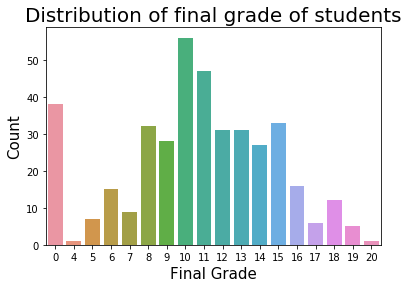

The average final grade of the maths students is 10.415189873417722


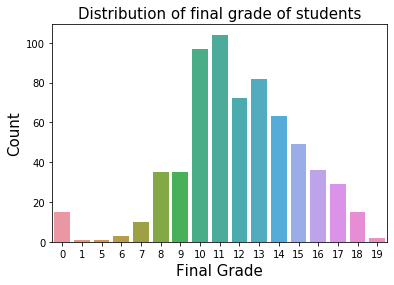

The average final grade of the Portuguese students is 11.906009244992296


In [7]:
b = sns.countplot(data_m['G3'])
b.axes.set_title('Distribution of final grade of students', fontsize = 20)
b.set_xlabel('Final Grade', fontsize = 15)
b.set_ylabel('Count', fontsize = 15)
plt.show()
G3m = data_m['G3']
average_G3m = stats.mean(G3m)
print('The average final grade of the maths students is ' + str(average_G3m))

b = sns.countplot(data_p['G3'])
b.axes.set_title('Distribution of final grade of students', fontsize = 15)
b.set_xlabel('Final Grade', fontsize = 15)
b.set_ylabel('Count', fontsize = 15)
plt.show()
G3p = data_p['G3']
average_G3p = stats.mean(G3p)
print('The average final grade of the Portuguese students is ' + str(average_G3p))

In [8]:
Markdown(f"""
We can also calculate that the average final grades
for maths and Portuguese students are {round(average_G3m, 3)} and 
{round(average_G3p, 3)}, respectively. This suggests that Portuguese
students score higher on average than maths students although this
comparision could easily have been skewed by the large number of
maths students scoring zero.
""")


We can also calculate that the average final grades
for maths and Portuguese students are 10.415 and 
11.906, respectively. This suggests that Portuguese
students score higher on average than maths students although this
comparision could easily have been skewed by the large number of
maths students scoring zero.


### Finding correlations

We are now going to automatically find the variables with the strongest correlation to the final grades for both datasets. Finding correlations between non-numeric features and the outcome can get a bit messy, so we will focus on testing only the existing numerical values of the datasets at first. To better visualize the insights, we will also use correlation heat maps for both datasets. For the heat maps, the darker a square is the stronger the correlation is. 

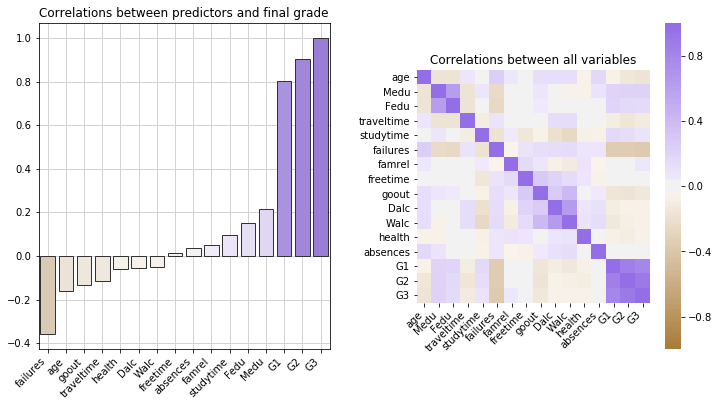

In [11]:
corr = data_m.corr()
grade_corr = corr['G3'].sort_values()

cmap = sns.diverging_palette(50, 275,s=80, l=55, n=200)

# match colour map with correlation plot
col_idx = [int((c + 1) * 199 / 2) for c in grade_corr]
bar_cols = sns.color_palette([cmap[i] for i in col_idx])

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plt.subplots_adjust(wspace=.3)

sns.barplot(
    grade_corr.index,
    grade_corr.values,
    palette=bar_cols,
    edgecolor=".2",
    ax=axs[0]
)
axs[0].set_xticklabels(
    axs[0].get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
axs[0].set_title("Correlations between predictors and final grade")
axs[0].grid(b=True, which='major', color='lightgrey', linewidth=1.0)
axs[0].set_axisbelow(True)

sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(50, 275,s=80, l=55, n=200),
    square=True,
    ax=axs[1]
)
axs[1].set_xticklabels(
    axs[1].get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
axs[1].set_title("Correlations between all variables");

failures     -0.393316
Dalc         -0.204719
Walc         -0.176619
traveltime   -0.127173
freetime     -0.122705
age          -0.106505
health       -0.098851
absences     -0.091379
goout        -0.087641
famrel        0.063361
Fedu          0.211800
Medu          0.240151
studytime     0.249789
G1            0.826387
G2            0.918548
G3            1.000000
Name: G3, dtype: float64


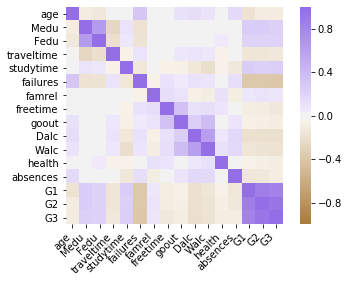

In [12]:
print(data_p.corr()['G3'].sort_values())
corr = data_p.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(50, 275,s=80, l=55, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Insights:
- For both datasets, the number of past classes failures has a strong negative correlation with the final grade.
- Other common variables with a negative correlation are: age, frequency of going out with friends, traveltime, consumption of alcohol and health. 
- G1 and G2 have very strong positive correlation coefficients for both datasets because student performence usually remains constant throughout the year; we will therefore ignore them. 
- Other common variabes with a positive correlation are: studytime, education of parents and family relationship.

### One-Hot Encoding

In order to get more insight from these datasets, we need to be able to use the categorical variables as well. An example of categorical variable is the school variable (the student is either at Gabriel Pereira or Mousinho da Silveira) where the variable values are nominal. We will use the One-Hot Encoding technique which assigns binary numbers to each variable values. Here is an example of how it would look like for the variable 'Father's job':

| Father's Job    | Occupation_teacher| Occupation_health | Occupation_services |Occupation_at_home |Occupation_other |
| ----------------|:----------------: |:-----------------:|:------------------: |:----------------: |:---------------: |
| teacher         | 1                 | 0                 | 0                   |0                  |0                 |
| health          | 0                 | 1                 | 0                   |0                  |0                 |
| services        | 0                 | 0                 | 1                   |0                  |0                 |
| at_home         | 0                 | 0                 | 0                   |1                  |0                 |
| other           | 0                 | 0                 | 0                   |0                  |1                 |

In [13]:
# Select only categorical variables for maths performance dataset
category_dfm = data_m.select_dtypes(include=['object'])

# One hot encode the variables
dummy_dfm = pd.get_dummies(category_dfm)

# Put the grade back in the dataframe
dummy_dfm['G3'] = data_m['G3']

In [14]:
# Select only categorical variables for Portuguese performance dataset
category_dfp = data_p.select_dtypes(include=['object'])

# One hot encode the variables
dummy_dfp = pd.get_dummies(category_dfp)

# Put the grade back in the dataframe
dummy_dfp['G3'] = data_p['G3']

We can now analyze the correlation coefficients for the final grades of all the variables for both datasets.

higher_no           -0.182465
romantic_yes        -0.129970
Mjob_at_home        -0.115634
address_R           -0.105756
sex_F               -0.103456
paid_no             -0.101996
reason_course       -0.098950
internet_no         -0.098483
Mjob_other          -0.096477
guardian_other      -0.087774
schoolsup_yes       -0.082788
famsize_GT3         -0.081407
Pstatus_T           -0.058009
Fjob_other          -0.053483
nursery_no          -0.051568
school_MS           -0.045017
famsup_yes          -0.039157
reason_home         -0.021359
Fjob_services       -0.016108
activities_no       -0.016100
Fjob_at_home        -0.013385
activities_yes       0.016100
guardian_mother      0.022338
guardian_father      0.032493
famsup_no            0.039157
school_GP            0.045017
nursery_yes          0.051568
reason_other         0.052008
Fjob_health          0.057111
Mjob_teacher         0.057712
Pstatus_A            0.058009
Mjob_services        0.078429
famsize_LE3          0.081407
schoolsup_

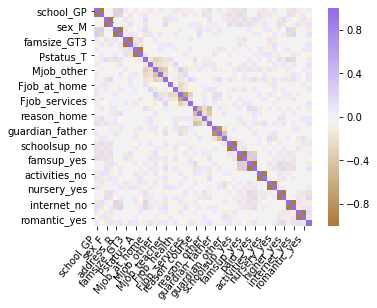

In [15]:
# Correlation coefficients for maths student performance
print(dummy_dfm.corr()['G3'].sort_values())

# To visualize data better we can add a correlation heat map
corr = dummy_dfm.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(50, 275,s=80, l=55, n=300),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=50,
    horizontalalignment='right'
);

In [ ]:
# Correlation coefficients for Portuguese student performance
print(dummy_dfp.corr()['G3'].sort_values())

# To visualize data better we can add a correlation heat map
corr = dummy_dfp.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(50, 275,s=80, l=55, n=300),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=50,
    horizontalalignment='right'
);

Insights:
- Variables that impact negatively final grades in both datasets: in a romantic rlationship, does not want to go to higher education, lives in a rural area, has a stay-at-home mum, has no access to internet.
- Variables that impact positively final grades in both datasets: not in a romantic relationship, wants to go to higher education, lives in a urban area, has access to internet.
- In Portuguese performance dataset, the school variable has a very high impact on the final grade (negatively impacted if goes to MS and positively impacted if goes to GP).
- Males seem to score higher in maths whereas females score higher in Portuguese 

### Data visualization

In [ ]:
# Grade distribution by address
sns.kdeplot(data_m.loc[data_m['address'] == 'U', 'G3'], label='Urban', shade = True)
sns.kdeplot(data_m.loc[data_m['address'] == 'R', 'G3'], label='Rural', shade = True)
plt.title('Urban vs Rural students Maths Performance', fontsize = 20)
plt.xlabel('Grade', fontsize = 20);
plt.ylabel('Density', fontsize = 20)
plt.show()
print()
sns.kdeplot(data_p.loc[data_p['address'] == 'U', 'G3'], label='Urban', shade = True)
sns.kdeplot(data_p.loc[data_p['address'] == 'R', 'G3'], label='Rural', shade = True)
plt.title('Urban vs Rural students Portuguese Performance', fontsize = 20)
plt.xlabel('Grade', fontsize = 20);
plt.ylabel('Density', fontsize = 20)
plt.show()

Insights: 
- For maths performance, not too much difference between urban and rural but urban students tend to score slightly more.
- For Portuguese performance, we can see that urban students score higher more often than rural students.

In [ ]:
#Scatter plot: final grade vs relationship status
b = sns.swarmplot(x='romantic', y='G3', data=data_m)
b.axes.set_title('Relationship vs Final grade Maths', fontsize = 25)
b.set_xlabel('Relationship', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show()
print()

#Print number of students in romantic relationship in the maths performance dataset
couple_maths= data_m[(data_m['romantic']) == "yes"]["romantic"].count()
print('In the maths dataset, ' + str(couple_maths) + ' students out of 395 are in a couple.')
print()

#Repeat for Portuguese dataset
b = sns.swarmplot(x='romantic', y='G3', data=data_p)
b.axes.set_title('Relationship vs Final grade Portuguese', fontsize = 25)
b.set_xlabel('Relationship', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show() 
print()
couple_por= data_p[(data_p['romantic']) == "yes"]["romantic"].count()
print('In the Portuguese dataset, ' + str(couple_por) + ' students out of 649 are in a couple.')

Insights: 
- In both datasets, there are more single students than in a relationship (only 33% in maths dataset and 36% in Portuguese dataset). This might skew results as there is less data to analyze for students in a relationship. We can see that in the Portuguese dataset where there are more values to analyze, the scatter plot shapes tend to look more similar. 
- Not enough data to say if relationship has true impact on maths performance. 

In [ ]:
#Grade distribution to compare maths performance for males and females
sns.kdeplot(data_m.loc[data_m['sex'] == 'F', 'G3'], label='Female', shade = True)
sns.kdeplot(data_m.loc[data_m['sex'] == 'M', 'G3'], label='Male', shade = True)
plt.title('Females vs Males Maths Performance', fontsize = 20)
plt.xlabel('Grade', fontsize = 20);
plt.ylabel('Density', fontsize = 20)
plt.show()

#Grade distribution to compare Portuguese performance for males and females
sns.kdeplot(data_p.loc[data_p['sex'] == 'F', 'G3'], label='Female', shade = True)
sns.kdeplot(data_p.loc[data_p['sex'] == 'M', 'G3'], label='Male', shade = True)
plt.title('Females vs Males Portuguese Performance', fontsize = 20)
plt.xlabel('Grade', fontsize = 20);
plt.ylabel('Density', fontsize = 20)
plt.show()



Insights: 
- Maths performance seems to be fairly similar for both genders but males seem to score higher than females a bit more often.
- For the Portuguese dataset, females tend to score higher than males more often.

In [ ]:
#Analyzing impact of choice of school on Portuguese performance
b = sns.swarmplot(x='school', y='G3', data=data_p)
b.axes.set_title('School Choice vs Final grade Portuguese', fontsize = 25)
b.set_xlabel('School', fontsize = 20)
b.set_ylabel('Final Grade', fontsize = 20)
plt.show() 
print()
school_MS= data_p[(data_p['school']) == "MS"]["school"].count()
print('In the Portuguese dataset, ' + str(school_MS) + ' students out of 649 are going to Mousinho da Silveira.')

Insights: 
- From the available data, MS students tend to score less than GP students in Portuguese. Maybe GP is specialized in Portuguese and students have access to higher-quality resources.
- However as for the relationship analysis, there are less students going to MS so it might affect results.

### Multi-linear regression model

We are now going to build a multi-linear regression model for both datasets. We will work only with the original numerical values of the dataset for simplicity. 

In [16]:
# Reload maths performance dataset
data = pd.read_csv(r'data\student-mat.csv', sep=';')

# Choose only numerical values of the dataset
data = data.select_dtypes('int64')
data = data[['famrel', 'age', 'failures', 'health', 'Medu', 'G3']]

# Set our prediction of a students final score (G3)
predict = 'G3'

# Split-up X & y and make sure that they are np array's
# sklearn needs numpy array's as inputs
X = np.array(data.drop(predict, axis=1))
y = np.array(data[predict])

# Split-up our current X & y variables into training and testing data.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=42
)

# Now we need to initiate our model and train it

linear = LinearRegression()
linear.fit(X_train, y_train)

# Lets take a look at how well this model preforms
print("The R^2 is: ", linear.score(X_test, y_test))
coeff = linear.coef_
intercept = linear.intercept_

for i in range(len(coeff)):
    print(data.columns[i], ': ', coeff[i])
print('The intercept of our slope is: ', intercept)



The R^2 is:  0.12902067885275392
famrel :  0.6705196258274518
age :  0.12015580187674257
failures :  -1.8823301394278142
health :  0.01101629262703201
Medu :  0.7383853659249365
The intercept of our slope is:  4.221009461802302


Insights for maths data set linear regression model:
- Our model explains explains 12.9% of the inputs into the final grade
- We can see that family relationship plays a big part in student performance: when a student increases their family relationship quality by 1 (e.g. from very good to excellent) they can expect an increase in final grade of 0.67 points.
- Failures also play a decisive role in student performance: if a student has failed 4 classes or more in the past, they can except a decrease of 1.88 in their final score. 
- Age and Mother's education also play a significant in student performance.

In [19]:
# Reload Portuguese performance dataset
data = pd.read_csv(r'data\student-por.csv', sep=';')

# Choose only numerical values of the dataset
data = data.select_dtypes('int64')
data = data[['famrel', 'age', 'failures', 'health', 'Medu', 'G3']]

# Set our prediction of a students final score (G3)
predict = 'G3'

# Split-up X & y and make sure that they are np array's
# sklearn needs numpy array's as inputs
X = np.array(data.drop(predict, axis=1))
y = np.array(data[predict])

# split-up our current X & y variables into training
# and testing data.

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=42
)

# Now we need to initiate our model and train it

linear = LinearRegression()
linear.fit(X_train, y_train)

# Lets take a look at how well this model preforms
print("The R^2 is: ", linear.score(X_test, y_test))
coeff = linear.coef_
intercept = linear.intercept_

for i in range(len(coeff)):
    print(data.columns[i], ': ', coeff[i])
print('The intercept of our slope is: ', intercept)

The R^2 is:  0.18379789863938334
famrel :  0.3459785645547586
age :  0.12429845975221776
failures :  -1.564277194336613
health :  -0.1196849810531379
Medu :  0.4545942308626128
The intercept of our slope is:  8.166804956860604


In [21]:
# sklearn learn is lacking in statistical inference so we'll have to bring in the big guns
import statsmodels.api as sm
from scipy import stats as sts

Z_train = sm.add_constant(X_train)
est = sm.OLS(y_train, Z_train)
preds = est.fit()
print(preds.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     4.936
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           0.000375
Time:                        12:11:03   Log-Likelihood:                -293.14
No. Observations:                 129   AIC:                             598.3
Df Residuals:                     123   BIC:                             615.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1668      3.194      2.557      0.0

Let's look at the row containing x4 (health). The coefficient we get outputted is -0.1197 as we obtained before. Notes though that the 95% confidence interval for this estimate (last two columns) contains zero. That is to say, there is not strong evidence to say that this correlation exists. This is actually a complex idea and runs into territories of multicolinearity—which we solve using PRC (principle component regression). I'm happy to explain this concept to you (I think 5/10 minutes would do it) but it would have to be over Skype as it's hard to write down. Basically, the point is, you can't always trust your estimates. In fact, the only predictor that we have strong evidence for being influential is x3 and x5 (failures and mother's education). This is the same conclusion that I reached when I did the analysis—mother's education is surprisingly important (I believe the most important when you allow for term interactions). Perhaps this is because stay at home mothering is more common in Portugal and so their education impacts children a lot.

Insights for Portuguese dataset linear regression model:
- Our model explains explains 18.37% of the inputs into the final grade
- We can see that family relationship als0 plays a big part in student performance: when a student increases their family relationship quality by 1 (e.g. from very good to excellent) they can expect an increase in final grade of 0.34 points.
- Failures also play a decisive role in student performance: if a student has failed 4 classes or more in the past, they can except a decrease of 1.56 in their final score. 
- Age and Mother's education also play a significant in student performance.

### Conclusion

We have seen that many factors can influence your final grades, most of them being socioeconomic characteristics (address, parent's education, family relationship...) that cannot be changed. 